Lakukan klasifikasi menggunaakan decision tree dari Data diabetes.csv

1. Baca data diabetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('diabetes.csv')

2. Tampilkan 5 baris pertama dari dataset

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3. Explore variabel 'Outcome'. Outcome = 1 bearti pasien memiliki penyakit diabetes dan Outcome = 0 menandakan pasien tidak memiliki penyakit diabetes

In [3]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

4. Periksa adanya missing values dalam dataset

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

5. Tentukan vektor fitur (features) dan variabel target (class)

In [5]:
x=df.drop(['Outcome'], axis = 1)

y=df['Outcome']

7. Membagi dataset menjadi 70% data latih (trainig set) dan 30% data uji (testing set)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

8. Lakukan prediksi dengan data uji

In [7]:
from sklearn.tree import DecisionTreeClassifier

df_en= DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

df_en.fit(x_train,y_train)

y_pred_en=df_en.predict(x_test)

9. Tampilkan skor akurasi dari hasil prediksi menggunakan data uji

In [9]:
from sklearn.metrics import accuracy_score

print('Akurasi dengan kriteria entropi: {0:0.4f}'.format(accuracy_score(y_test,y_pred_en)))

Akurasi dengan kriteria entropi: 0.7186


10. Bandingkan akurasi data latih (training set) dan data uji (testing set)

In [11]:
y_pred_train_en=df_en.predict(x_train)

y_pred_train_en

print('Akurasi Data Latih: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_en)))
print('Training Score: {:.4f}'.format(df_en.score(x_train, y_train)))
print('Test Score: {:.4f}'.format(df_en.score(x_test, y_test)))

Akurasi Data Latih: 0.7635
Training Score: 0.7635
Test Score: 0.7186


11. Buat visualisai Decision Tree yang telah dibuat

[Text(334.8, 380.52, 'X[1] <= 154.5\nentropy = 0.934\nsamples = 537\nvalue = [349, 188]'),
 Text(167.4, 271.8, 'X[5] <= 26.35\nentropy = 0.823\nsamples = 454\nvalue = [337, 117]'),
 Text(83.7, 163.07999999999998, 'X[1] <= 124.5\nentropy = 0.219\nsamples = 114\nvalue = [110, 4]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.085\nsamples = 94\nvalue = [93, 1]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.61\nsamples = 20\nvalue = [17, 3]'),
 Text(251.10000000000002, 163.07999999999998, 'X[7] <= 28.5\nentropy = 0.917\nsamples = 340\nvalue = [227, 113]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.662\nsamples = 163\nvalue = [135, 28]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.999\nsamples = 177\nvalue = [92, 85]'),
 Text(502.20000000000005, 271.8, 'X[5] <= 28.7\nentropy = 0.596\nsamples = 83\nvalue = [12, 71]'),
 Text(418.5, 163.07999999999998, 'X[5] <= 25.35\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(376.65000000000003, 54.360000000000014, 'entrop

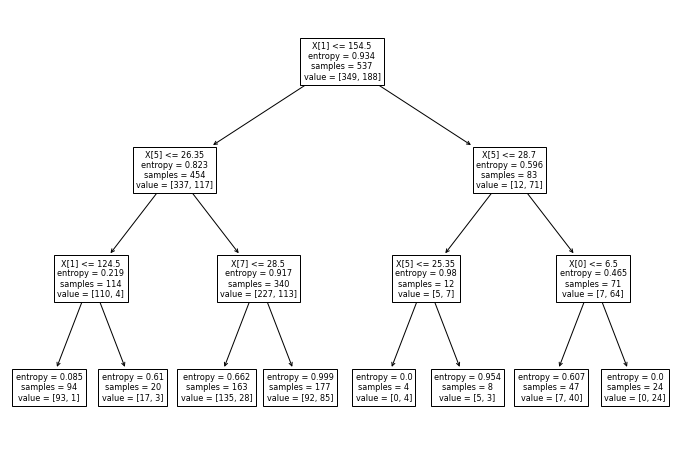

In [22]:
from sklearn import tree
plt.figure(figsize=(12,8))

tree.plot_tree(df_en.fit(x_train,y_train))

12. Buatlah Confusion matrix dari hasil klasifikasi yang telah dilakukan!

In [23]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, y_pred_en)

print('Confusion Matrix\n\n', cm)

Confusion Matrix

 [[141  10]
 [ 55  25]]


13. Tampilkan Classification Report

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       151
           1       0.71      0.31      0.43        80

    accuracy                           0.72       231
   macro avg       0.72      0.62      0.62       231
weighted avg       0.72      0.72      0.68       231

